In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from fastai.imports import *
from fastai.conv_learner import *

In [2]:
PATH = '/root/data/sar_cars/'

label_csv = f'{PATH}labels_balanced.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

#from fastai.models.cifar10.senet import SENet18
#f_model = SENet18()

f_model = resnet50

def get_data(sz,bs):    
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    suffix='.png', val_idxs=val_idxs, bs=bs)

data = get_data(160,32)

 79%|███████▉  | 826/1039 [01:28<00:22,  9.31it/s, loss=7.46]

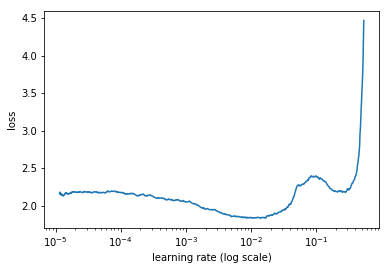

In [3]:
learn  = ConvLearner.pretrained(f_model, data, pretrained=False, precompute=False)
learn.unfreeze()
assert learn.model[0].trainable == True
lrf=learn.lr_find()
learn.sched.plot()

In [ ]:
learn.fit(1e-4, 20, cycle_len=2, cycle_mult=1)

epoch      trn_loss   val_loss   accuracy                     
    0      1.950559   1.695427   0.295583  
    1      1.895822   1.669413   0.301119                     
    2      1.778746   1.592626   0.340835                     
    3      1.717038   1.581844   0.346612                     
    4      1.689668   1.535339   0.360573                     
    5      1.618161   1.515085   0.374534                     
    6      1.597175   1.475706   0.404381                     
    7      1.554895   1.46092    0.405705                     
    8      1.537718   1.421428   0.435913                     
    9      1.473295   1.404013   0.442412                     
    10     1.436116   1.362634   0.463473                     
    11     1.369814   1.348741   0.472259                     
    12     1.372486   1.303484   0.495126                     
    13     1.343099   1.296478   0.495246                     
    14     1.288476   1.250768   0.520881                     
    15     